# <font color = '#70e3d7'> **AI Integration and Socio-economic Dynamics: A Global Analysis**</font>


### <span style="color:#83898b">*Author: Syeda Bisha Fatima 100861074*



#  <font color = '#70e3d7'> Introduction </font>
In an era where data driven decision making is paramount, the crossover of data science and AI has become a focal point for assessing a countrys technological prowess and innovation. This project aims to explore and evaluate the AI usage and implementation index (Talent) for various countries and establish the correlation between this index and key socioeconomic factors such as income group,infrastructure , research, Political Regime and more. By delving into these interconnected metrics, we can gain insights into how AI adoption is influenced by a countrys position in the global landscape, shedding light on the evolving dynamics of AI-driven progress on a global scale and provide the ideal conditions to let AI Index grow.

Preparing the Data

In [1]:
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt


Load the data

In [2]:

talent = pd.read_csv('AI_index_db.csv')


Confirming all columns have values (No NaNs)


In [3]:
# Removing spaces from column names
talent.columns = ['Country', 'Talent', 'Infrastructure', 'Operating_Environment', 'Research', 'Development', 'Government_Strategy', 'Commercial', 'Total_Score', 'Region', 'Cluster','Income_Group', 'Political_Regime']
talent.count()

Country                  62
Talent                   62
Infrastructure           62
Operating_Environment    62
Research                 62
Development              62
Government_Strategy      62
Commercial               62
Total_Score              62
Region                   62
Cluster                  62
Income_Group             62
Political_Regime         62
dtype: int64

No furthur cleaning is required for the data as it has all the values and the data representation is easy to process and analyse

##  <font color = '#70e3d7'> Analysis </font>

### *Exploring the relationship between different socio economic factors and their influence on the AI talent index to determine what conditions are best to boost AI talent index*

### Assessing the distribution of Talent Index by Region
From the box plots, we can see that Asia Pacific and Europe have the most evenly distributed talent index, indicating that all countries in those regions are advancing together mostly as the data is positively skewed and the variability is high. Even though Americas has the highest Maximum value of 100, it is an outlier and way ahead of the rest of the countries in its region and the rest of the world and this could be due to it ranking highly in most socio economic factors. The Middle East and Africa have the lowest variabilty and median values, this could mainly be due to the fact most countries in these regions are underdeveloped or developing countries, yielding less resources and investments for AI advancement and more for social and humanitarian needs. Overall I belive Asia-Pacific and Europe countries are moving forward at the same rate and in the long term are likely to achieve and maintain a high AI Index

In [4]:

import plotly.express as px
# Creating a box plot to compare the distribution of Talent Index by Region

# Define a darker Pastel1 color scale
custom_colors = ['#440154', '#3E4A89', '#29788E', '#22A784', '#79D151', '#FDE725']


fig = px.box(talent, x='Region', y='Talent',
             title='Figure 1 : Distribution of Talent Index by Region',
             labels={'Talent': 'Talent Index'},
             height=800,
             color='Region',  # Color by Region
             color_discrete_sequence=custom_colors,  
             
             ) 

# Update layout for larger y-axis scale and labels
fig.update_layout(
    yaxis=dict(title=dict(text='Talent Index', font=dict(size=14)), tickfont=dict(size=12), range=[0, 105]),  # Adjust y-axis scale
    xaxis=dict(title=dict(text='Region', font=dict(size=14))),
)

fig.show()




### Affect of Infrastructure on Talent Index
From the line graph we can see that there is a positive correlation between Infrastructure and talent index as the general trend for Infrastructure and talent are the same. This could be because improved infrastructure promotes talent development through better access to education, encouragement of R&D innovation, and a flourishing business environment. Modern infrastructure raises living standards and draws in highly qualified people, and worldwide connectivity makes cross-border cooperation and cross-cultural exchanges easier. The relationship that exists between economic growth and infrastructure development highlights the critical role that infrastructure plays in fostering an environment that is favorable to talent, innovation, and prosperity.

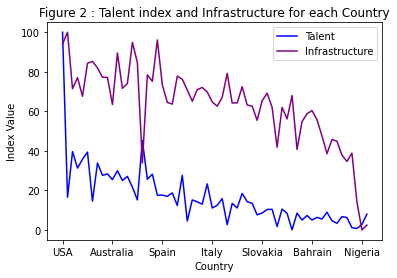

In [5]:
talent.plot(kind='line', x='Country', y='Talent', color='blue', label='Talent')
plt.plot(talent['Infrastructure'], color='purple', label='Infrastructure')
plt.legend()
plt.title('Figure 2 : Talent index and Infrastructure for each Country')
plt.xlabel('Country')
plt.ylabel('Index Value')
plt.show()


### Exploring the affects of Income group and Political Regime on Talent index
We can see from the grouped data and the heat map that the countries with a high income group and a Liberal democracy have the highest average Talent index infering the highest technological advancement. This trend can be explained as high-income liberal democracies often allocate substantial resources to research and development activities. This investment can lead to breakthroughs in technology and innovation. High income countries also invest in education which leads to a workforce better equipped to innovate and raise the talent index.


In [6]:
#Average talent index grouped by political regime and income groups
grouped_data = talent.groupby(["Political_Regime", "Income_Group"])["Talent"].mean().reset_index()
display(grouped_data)

,Political_Regime,Income_Group,Talent
0,Closed autocracy,High,3.032500
1,Closed autocracy,Lower middle,4.850000
2,Closed autocracy,Upper middle,16.510000
3,Electoral autocracy,High,10.340000
4,Electoral autocracy,Lower middle,11.574000
5,Electoral autocracy,Upper middle,11.450000
6,Electoral democracy,High,15.717273
7,Electoral democracy,Lower middle,6.906667
8,Electoral democracy,Upper middle,6.641667
9,Liberal democracy,High,25.143704


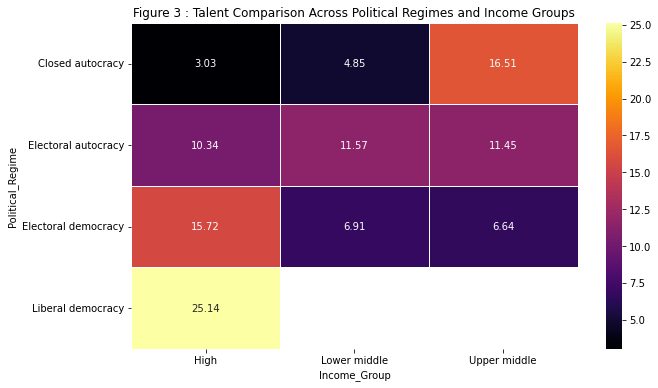

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Pivot the data for creating a heatmap
heatmap_data = talent.pivot_table(values='Talent', index='Political_Regime', columns='Income_Group')

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, cmap='inferno', annot=True, fmt=".2f", linewidths=.5)
plt.title('Figure 3 : Talent Comparison Across Political Regimes and Income Groups')
plt.show()


### Comparing the effect of R&D and Government Strategy on the Talent Index
From Figure 5 we can tell there is a linear relation between Government Strategy and R&D and we furthur explore the affects of this relation in figure 4 with Talent index. a general trend is observed with Higher the Government Strategy and R&D score, bigger the Talent Index dot (value). However, the relation between Government Strategy and R&D is not very strong given the variability of the plot in Figure 5 and the low gradient of the line, thus we can conclude that Government Strategy does affect Talent index but is definelty not the most influential factors as the  circles in Figure 4 are observed to be bigger as the R&D value increases for the same Government Strategy value. Overall they both affect Talent index but R&D affects it more than Government Strategy

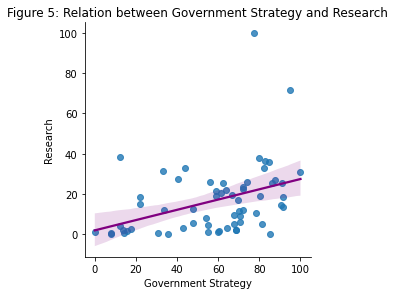

In [8]:
import plotly.express as px


#the size factor changes the size of the dots according to their Talent index value, so larger the dot, more effective the Govt Strategy and R&D
fig = px.scatter(talent, x='Research', y='Government_Strategy', size='Talent', color='Talent',                        
                labels={'Research': 'Research and Development', 'Government Strategy': 'Government Strategy'},
                 title='Figure 4 : Comparison of Research and Development, Government Strategy, and Talent Index')

p = sns.lmplot(data=talent, y="Research", x="Government_Strategy", height=4, line_kws={'color': 'purple'})

# Adding a title
p = (p.set_axis_labels("Government Strategy", "Research")
      .set(title="Figure 5: Relation between Government Strategy and Research"))



fig.show()
plt.show()



## Operating enironment in different clusters and how it impacts Talent index



In [9]:
grouped = talent.groupby(['Cluster'])["Region"].describe()
display(grouped)


,count,unique,top,freq
Cluster,,,,
Nascent,5,3,Asia-Pacific,2
Power players,2,2,Americas,1
Rising stars,11,3,Europe,6
Traditional champions,4,2,Europe,3
Waking up,40,5,Europe,20


In [10]:

grouped_stats = talent.groupby(['Cluster'])["Operating_Environment"].describe().round(2)
display(grouped_stats)

,count,mean,std,min,25%,50%,75%,max
Cluster,,,,,,,,
Nascent,5.0,25.64,19.68,0.00,12.48,29.84,35.79,50.10
Power players,2.0,78.06,19.10,64.56,71.31,78.06,84.82,91.57
Rising stars,11.0,68.64,15.58,43.15,59.38,70.15,80.60,88.05
Traditional champions,4.0,79.71,10.30,70.22,73.54,77.34,83.50,93.94
Waking up,40.0,69.78,15.98,36.65,59.23,68.85,80.66,100.00


Even though most countries are under the Waking up Cluster, the highest average belongs to the Traditional Champions and they are located in Europe, which supports our theory from Figure 1 that Europe (where 3 out of the 4 countries belong to) is progressing with the most ideal circumstances and at a steady and productive pace. This is furthur seen as 20 European countries make up the Waking Up Clster and it holds the 3rd largest average.

Checking for the relation between Talent index and Operating Environment to confirm our findings as a direct relation between them means that a higher operating environment score positively affects the talent index

In [11]:
correlation_matrix = talent[['Operating_Environment', 'Talent']].corr().round(2)
print(correlation_matrix)


                       Operating_Environment  Talent
Operating_Environment                   1.00    0.16
Talent                                  0.16    1.00


the regression coefficient of 0.16 > 0 indicates a positive correalation between them

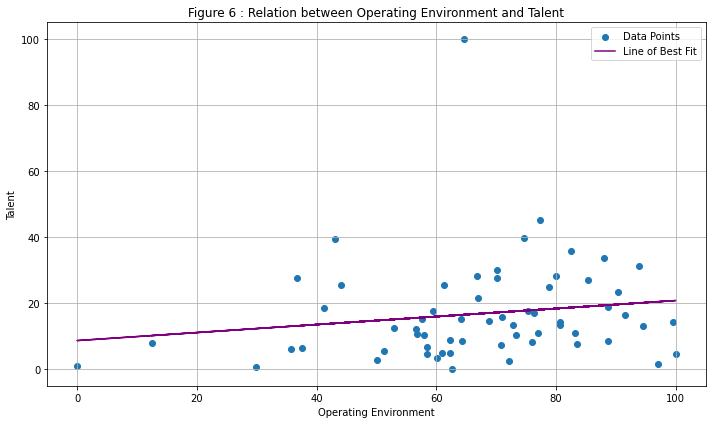

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Assuming df is your DataFrame
x = talent['Operating_Environment'].values.reshape(-1, 1)
y = talent['Talent'].values

# Fit a linear regression model
model = LinearRegression()
model.fit(x, y)

# Generate predictions for the line of best fit
predictions = model.predict(x)

# Plot the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(talent['Operating_Environment'], talent['Talent'], marker='o', label='Data Points')

# Plot the line of best fit
plt.plot(talent['Operating_Environment'], predictions, color='purple', label='Line of Best Fit')

plt.xlabel('Operating Environment')
plt.ylabel('Talent')
plt.title('Figure 6 : Relation between Operating Environment and Talent')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


##  <font color = '#70e3d7'> Discussions </font>
After my exploratory analysis, i have concluded that the best socio economic factors that will help grow and maintain the talent Index are high income groups, with a liberal democracy politicial regime, and a high investment in maintaining a good operating environment and infrastructure can yield long term results. Governemnt Strategy didnot seem to affect the talent index value as much , however this could be due to lack of suffiecient data to make accurate judgements, but a combination of a well structured governemnt starategy paired with R&D can certainly assist in increasing the Talent index .

##  <font color = '#70e3d7'> References </font>
1. Source data - Kaggle                 https://www.kaggle.com/datasets/katerynameleshenko/ai-index
2. Pandas for data manipulation         https://pandas.pydata.org/
3. Seaborn for data viz and aesthetics  https://seaborn.pydata.org/
4. Matplotlib.pyplot for data viz       https://matplotlib.org/
5. Chat GPT                             https://chat.openai.com/